# Wine Variety Classification

![](../../Assets/wine.webp)

By ``Abhijeet Srivastav``

**Connect with me**
- [LinkedIn](https://www.linkedin.com/in/abhijeet-srivastav-02245a18b/)
- [Github](https://github.com/AbhijeetSrivastav/Data-Science-Guide)
- [Social](https://www.instagram.com/abhijeet.codes/)

**AIM-** Predicting the class of the wine.

**Dataset Information**

- These data are the results of a chemical analysis of wines grown in the same region in Italy but derived from three different cultivars. The analysis determined the quantities of 13 constituents found in each of the three types of wines.     
- This dataset has 178 rows and 14 columns
- Dataset [Source](https://archive.ics.uci.edu/ml/datasets/wine)

**Attribute Information**
1. Alcohol
2. Malic acid
3. Ash
4. Alkalinity of ash
5. Magnesium
6. Total phenols
7. Flavonoid
8. Nonflavanoid phenols
9. Proanthocyanins
10. Color intensity
11. Hue
12. OD280/OD315 of diluted wines
13. Proline


## 0. Required Imports

In [71]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import warnings

In [34]:
%matplotlib inline

warnings.filterwarnings("ignore")

## 1. Data Collection

In [26]:
df =  pd.read_csv('../../Dataset/wine.csv')

In [27]:
df.head()

,1,14.23,1.71,2.43,15.6,127,2.8,3.06,.28,2.29,5.64,1.04,3.92,1065
0,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
1,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
2,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
3,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
4,1,14.20,1.76,2.45,15.2,112,3.27,3.39,0.34,1.97,6.75,1.05,2.85,1450


## 2. Data Preprocessing - First Pass

### 2.1. Adding Headers

In [28]:
df.columns = [  'wine'
                 ,'alcohol'
             	,'malicAcid'
             	,'ash'
            	,'ashalcalinity'
             	,'magnesium'
            	,'totalPhenols'
             	,'flavanoids'
             	,'nonFlavanoidPhenols'
             	,'proanthocyanins'
            	,'colorIntensity'
             	,'hue'
             	,'od280_od315'
             	,'proline'
                ]

In [29]:
df.head()

,wine,alcohol,malicAcid,ash,ashalcalinity,magnesium,totalPhenols,flavanoids,nonFlavanoidPhenols,proanthocyanins,colorIntensity,hue,od280_od315,proline
0,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
1,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
2,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
3,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
4,1,14.20,1.76,2.45,15.2,112,3.27,3.39,0.34,1.97,6.75,1.05,2.85,1450


In [30]:
df.shape

(177, 14)

## 3. Exploratory Data Analysis

### 3.1. Checking for Missing values

Plotting missing values count for each column

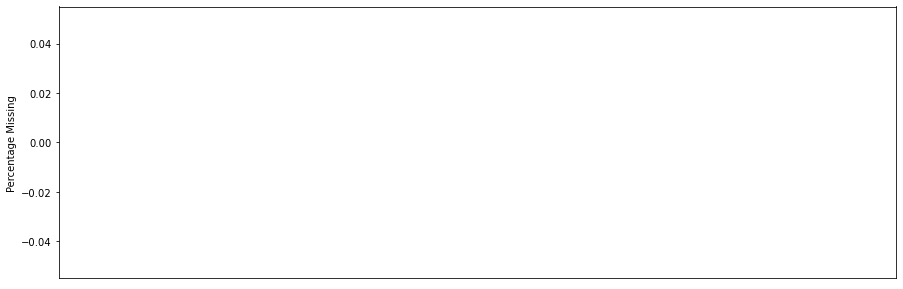

In [39]:
fig, ax = plt.subplots(figsize=(15,5))

"dividing the sum of na values in each column then multiplying it to convert into percentage after that showing in frame after sorting from 0 in descending order"

missing = df.isna().sum().div(df.shape[0]).mul(100).to_frame().sort_values(by=0, ascending=False)

ax.bar(missing.index, missing.values.T[0])

plt.xticks([])
plt.ylabel('Percentage Missing')
plt.show()

Heat map of missing values

<AxesSubplot:>

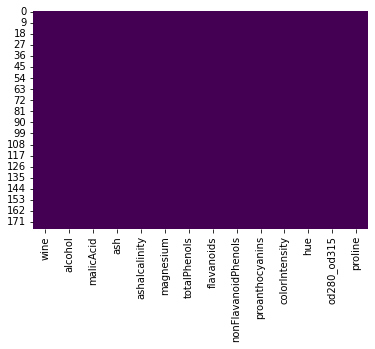

In [38]:
sns.heatmap(df.isna(), cbar=False, cmap='viridis')

**Observations:**
- Their are no missing values

### 3.2. Checking the Data types of features

In [40]:
df.dtypes

wine                     int64
alcohol                float64
malicAcid              float64
ash                    float64
ashalcalinity          float64
magnesium                int64
totalPhenols           float64
flavanoids             float64
nonFlavanoidPhenols    float64
proanthocyanins        float64
colorIntensity         float64
hue                    float64
od280_od315            float64
proline                  int64
dtype: object

**Observations:**
- All the columns are having relevant data types

### 3.3. Visualizing the unique classes of wine

<AxesSubplot:xlabel='wine', ylabel='Count'>

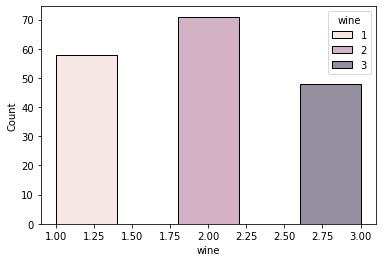

In [43]:
sns.histplot(df, x='wine', hue='wine', bins=5)

In [61]:
df["wine"].value_counts()

2    71
1    58
3    48
Name: wine, dtype: int64

**Observations:**
- Dataset has balanced data of each class of wine

### 3.4. Distribution of each of independent features

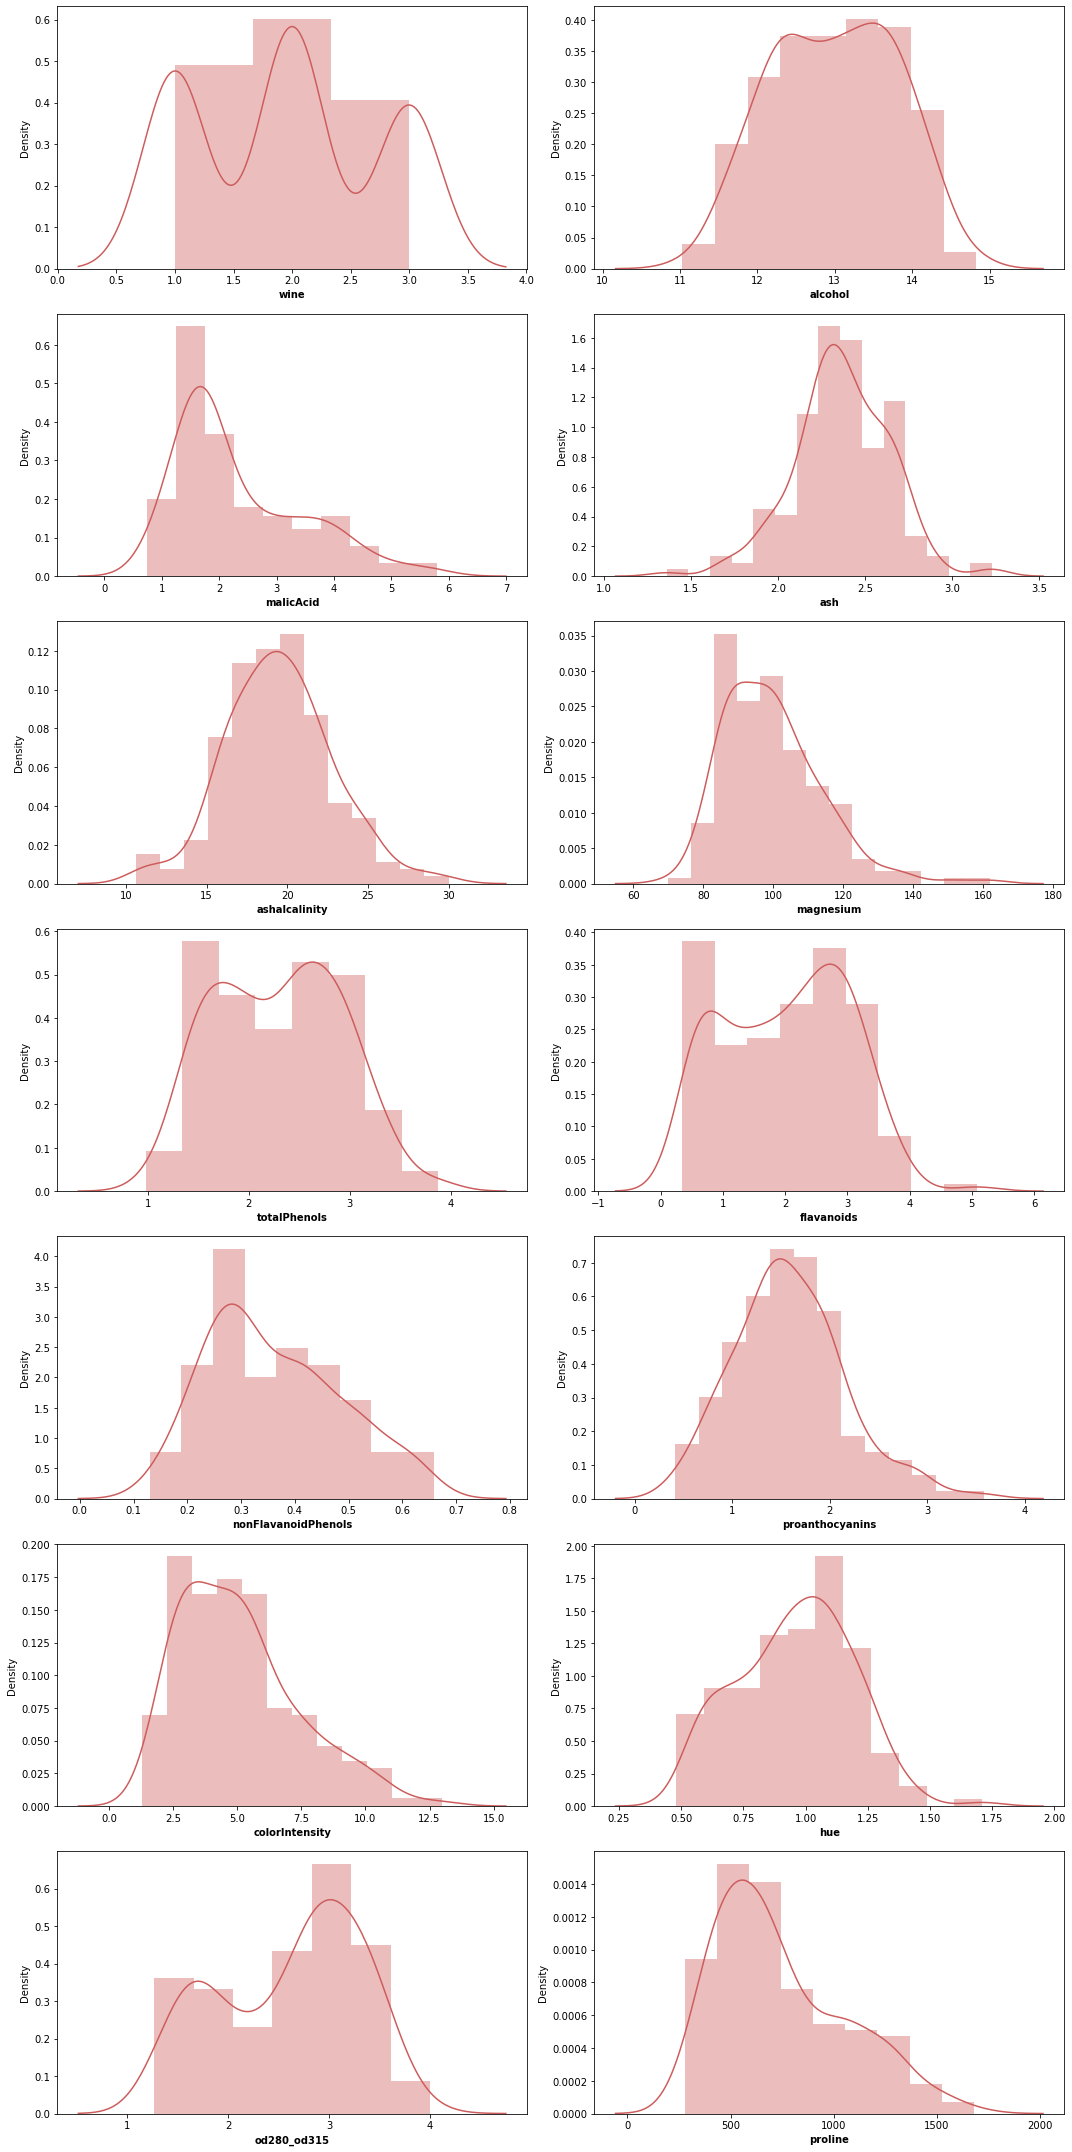

In [58]:
plt.figure(figsize=(15, 30))

for i, feature in enumerate(df.columns):
    plt.subplot(7, 2, i+1)
    sns.distplot(x=df[feature], color='indianred')
    plt.xlabel(feature, weight="bold")
    plt.tight_layout() 

### 3.5. Distribution of each independent feature with overlay of wine classes

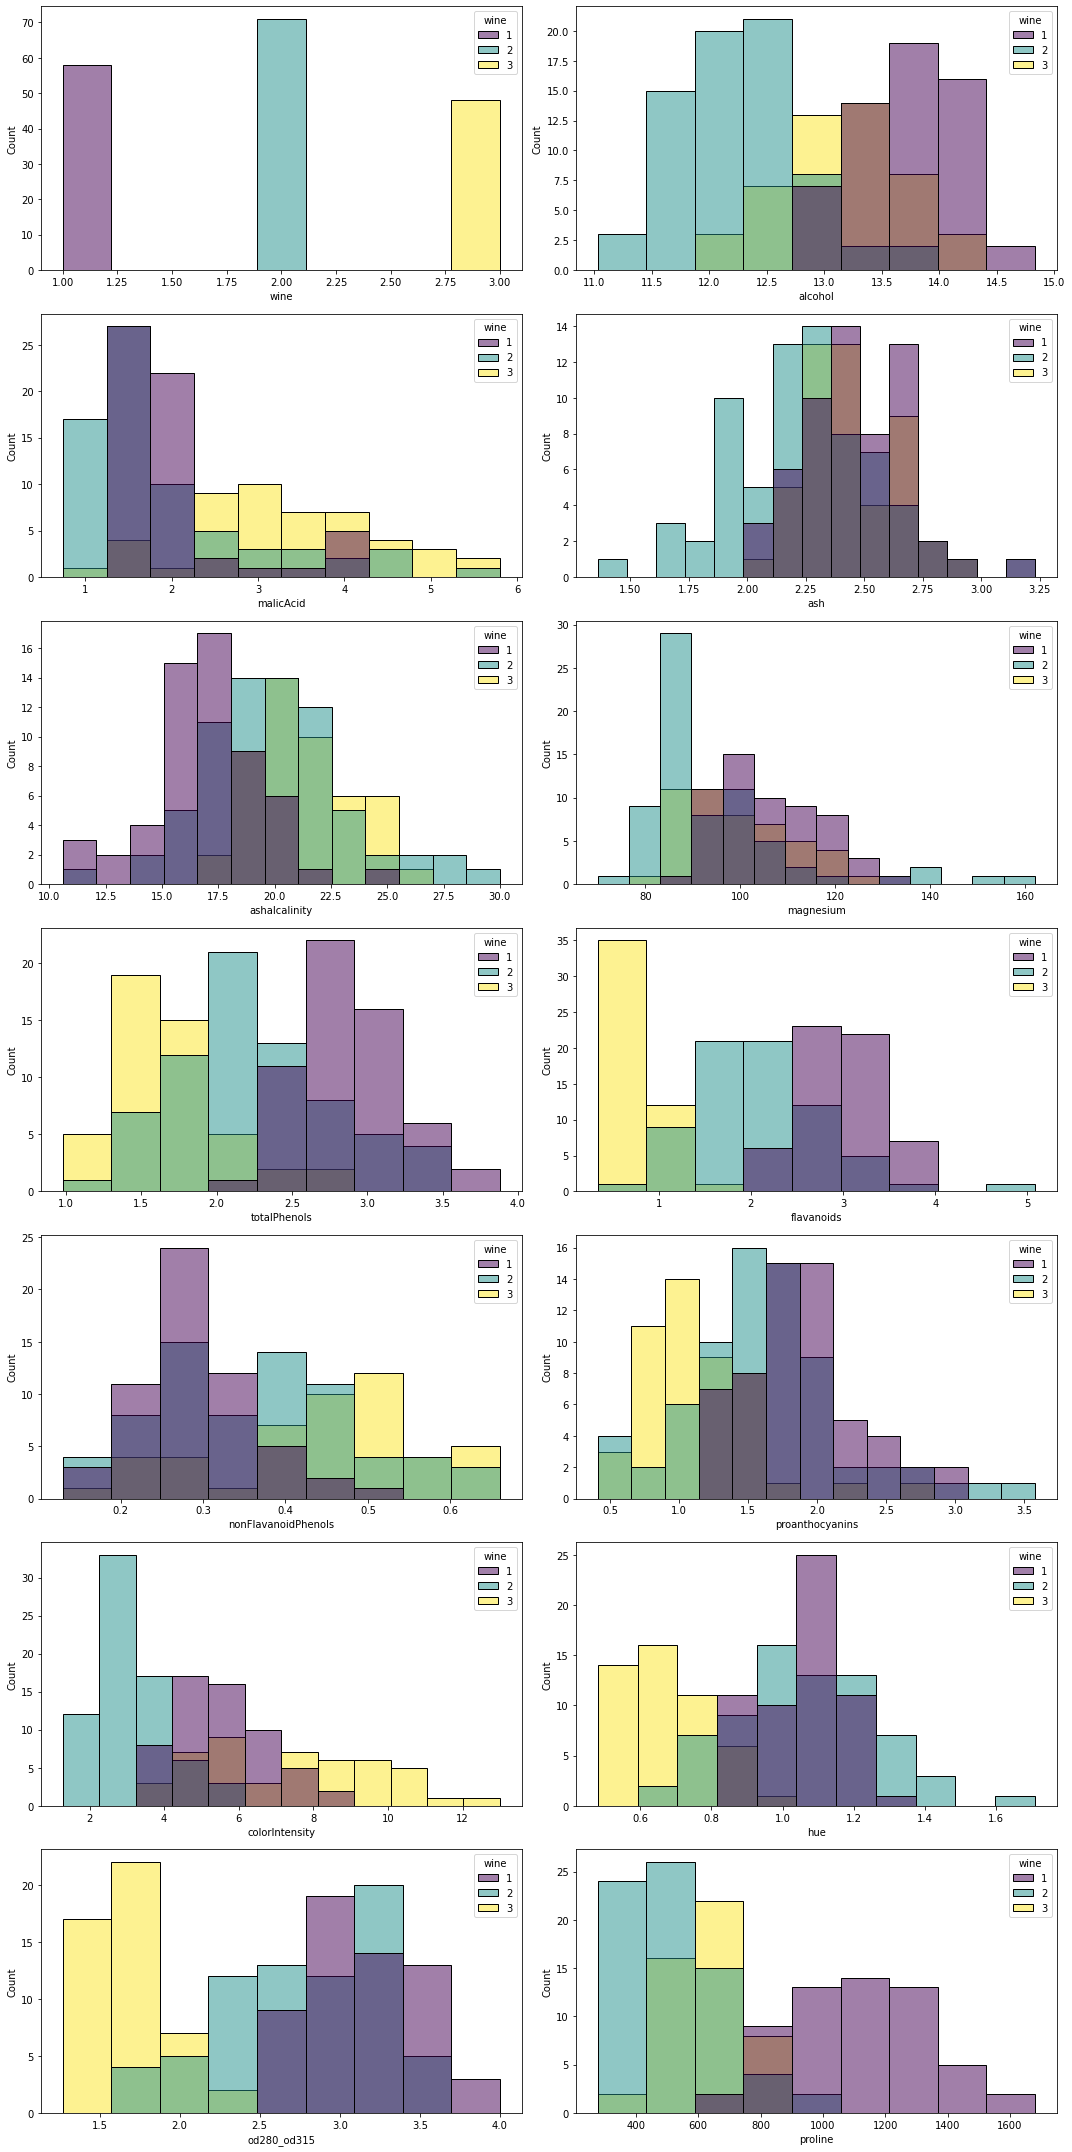

In [60]:
n = 1
plt.figure(figsize=(15,30))
for feature in df.columns:
    plt.subplot(7, 2, n)
    n += 1
    sns.histplot(df, x=feature, hue="wine", palette='viridis')
    plt.tight_layout()

**Observations:**
From section 3.4 and 3.5 

- All the features are normally distributed.
- Transformation is not required as its a classification problem.
- Data for each of the wine class is evenly distributed within each of the features.

### 3.6. Detection of Outliers

**Detecting Outliers using Box plot**

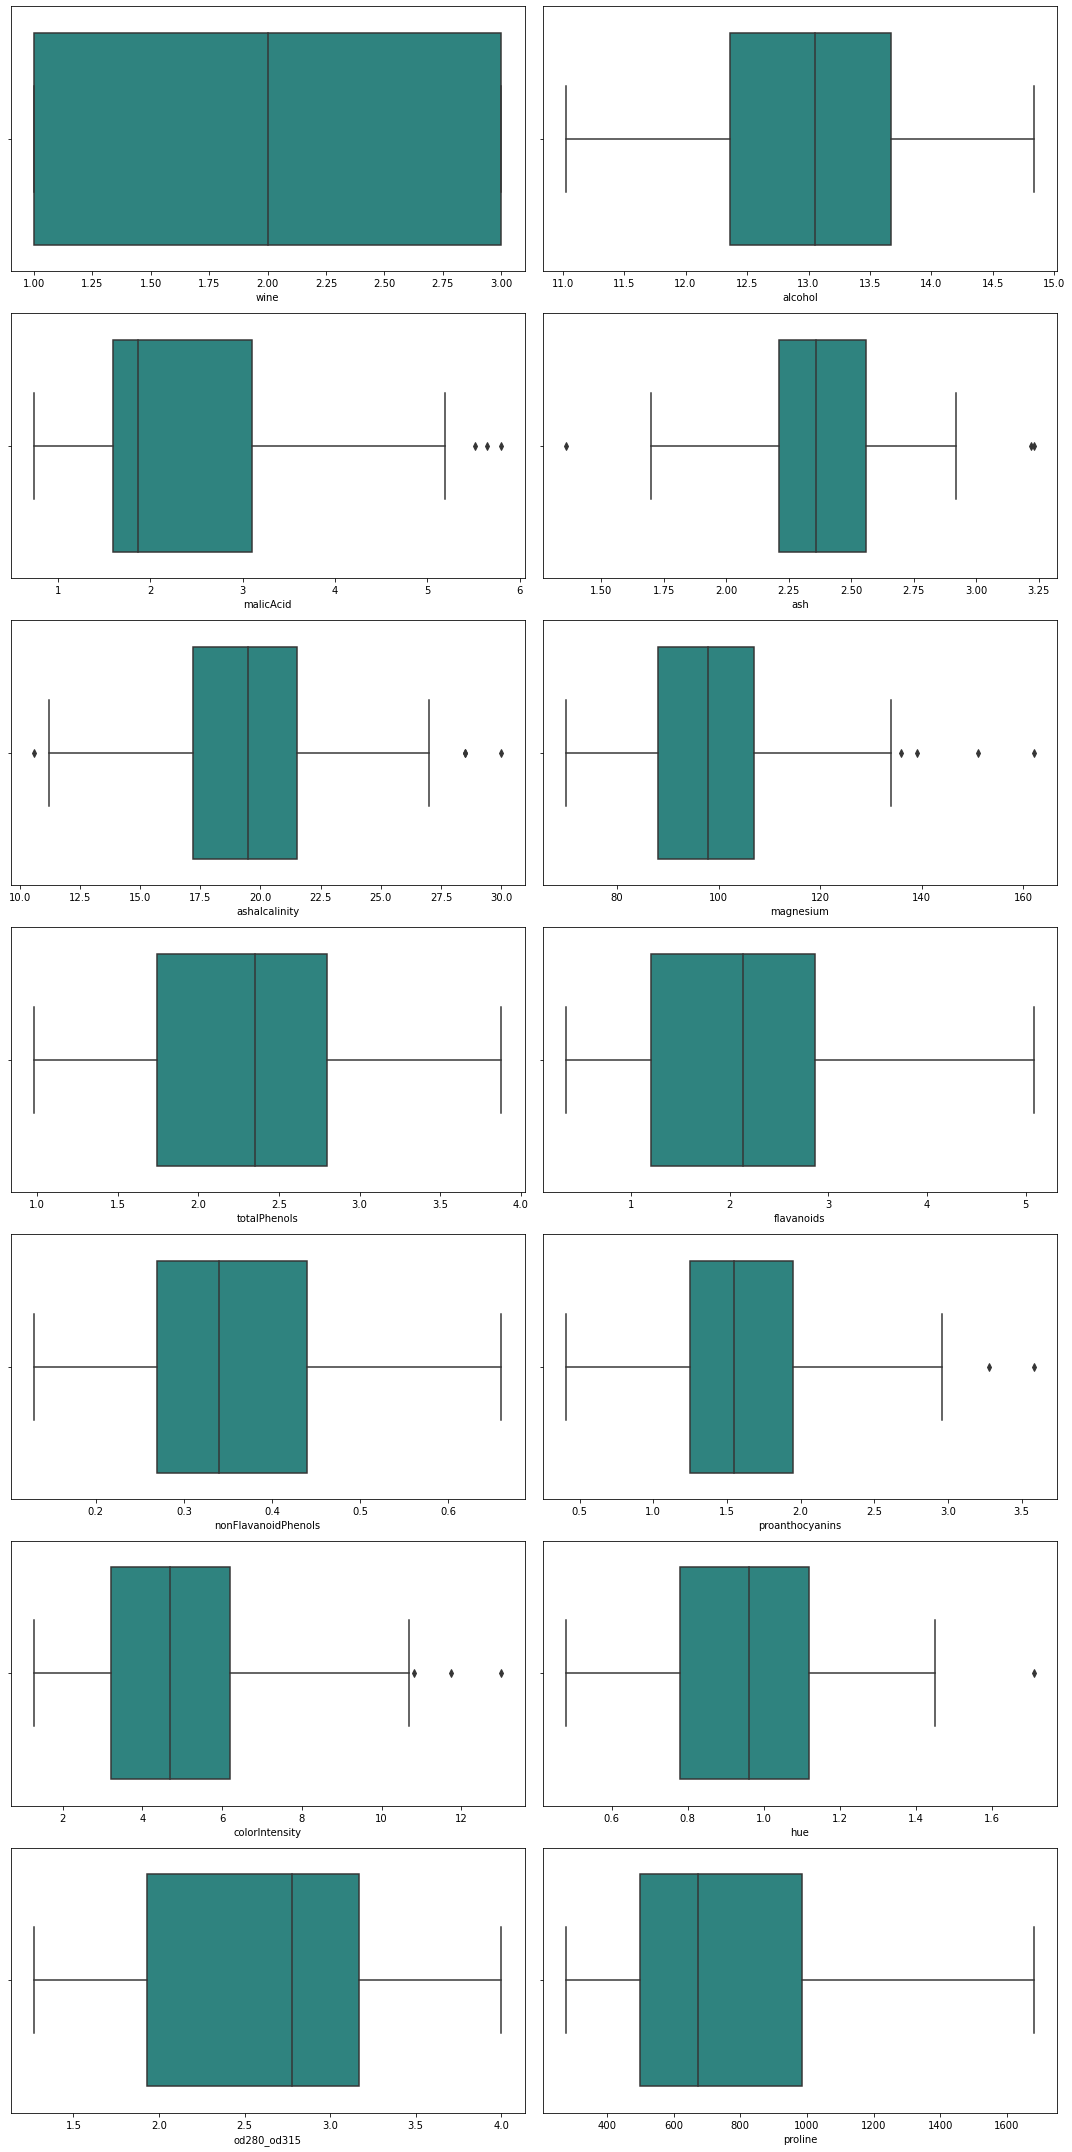

In [63]:
n = 1
plt.figure(figsize=(15, 30))
for feature in df.columns:
    plt.subplot(7, 2, n)
    n += 1
    sns.boxplot(df[feature], palette="viridis")
    plt.xlabel()
    plt.tight_layout()

**Observations:**
- Feature od280_od315, proline, nonFlavanoidPhenols, flavonoid, totalPhenols, alcohol and wine has not outliers.
- Feature colorIntensity, hue, proanthocyanins, magnesium, ashalcalinity, ash, malicAcid has outliers in small amount.

### 3.7. Correlation of features

<AxesSubplot:>

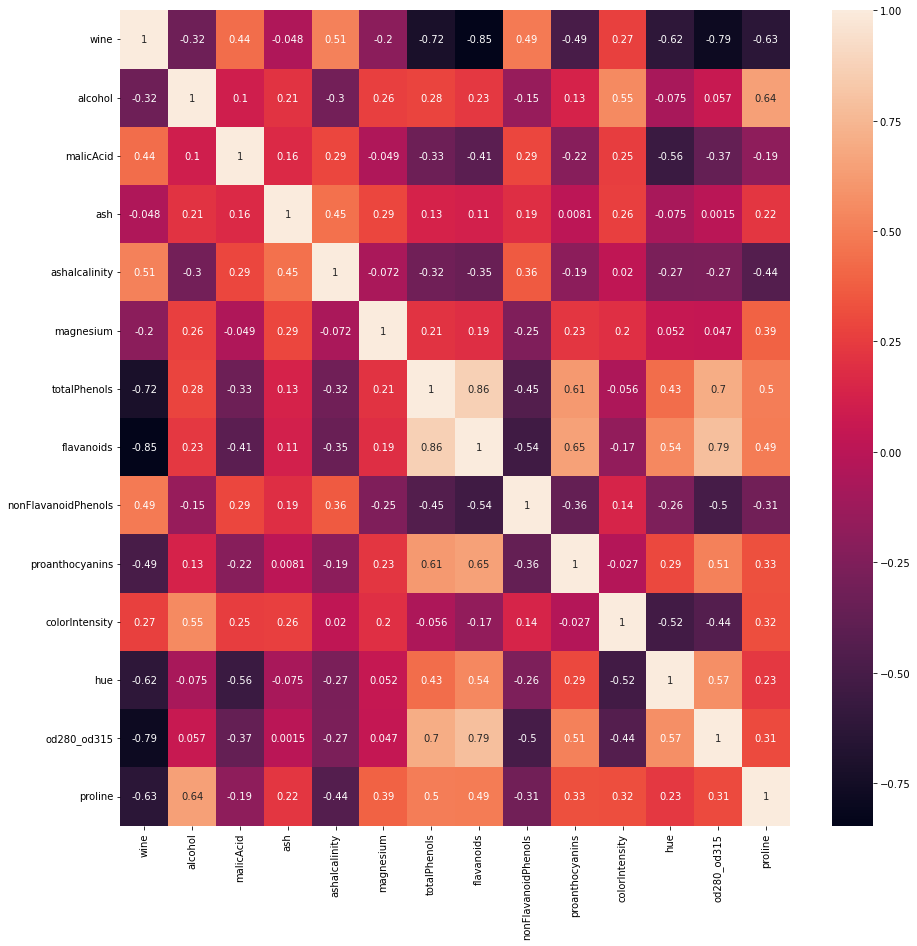

In [99]:
plt.figure(figsize=(15, 15))
sns.heatmap(df.corr(), annot=True)

**Observations:**
- None of the features are highly correlated to each other so we don't need to drop any of the features.

## 4. Data Preprocessing - Second Pass

### 4.1. Treating Outliers

In [107]:
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = df.apply(stats.iqr)

In [108]:
lower_fence = df < (Q1 - 1.5* IQR)
higher_fence = df > (Q3 + 1.5 * IQR)

In [109]:
filter = ~(lower_fence | higher_fence).any(axis=1)  # ~ is reverse operator and will select row between the fences

In [110]:
df = df[filter]

In [112]:
df.shape

(161, 14)

## 5. Model Building

### 5.1. Feature Segregation

In [115]:
x = df[df.columns.drop("wine")]
y = df["wine"]

### 5.2. Train Test Split

In [118]:
from sklearn.model_selection import train_test_split

In [120]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=1)

### 5.3. KNN Model Training

In [128]:
from sklearn.neighbors import KNeighborsClassifier

In [129]:
knn_raw = KNeighborsClassifier(n_neighbors=3)

In [130]:
knn_raw.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=3)

### 5.4. Hyperparameter tuning the KNN model

In [124]:
from sklearn.model_selection import GridSearchCV

In [125]:
grid_parameters = {
    "n_neighbors": [i for i in range(1, 20)],
    "weights": ["uniform", "distance"],
    "metric" : ["minkowski","euclidean", "manhattan"]
}

In [235]:
Tunned_KNN = GridSearchCV(estimator=KNeighborsClassifier(), param_grid=grid_parameters, verbose=1, n_jobs=-1, cv=3)

In [236]:
Tunned_KNN.fit(x_train, y_train)

Fitting 3 folds for each of 114 candidates, totalling 342 fits


GridSearchCV(cv=3, estimator=KNeighborsClassifier(), n_jobs=-1,
             param_grid={'metric': ['minkowski', 'euclidean', 'manhattan'],
                         'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                         13, 14, 15, 16, 17, 18, 19],
                         'weights': ['uniform', 'distance']},
             verbose=1)

In [237]:
Tunned_KNN.best_estimator_

KNeighborsClassifier(metric='manhattan', n_neighbors=1)

In [238]:
Tunned_KNN.best_params_

{'metric': 'manhattan', 'n_neighbors': 1, 'weights': 'uniform'}

## 6. Model Evaluation 

In [224]:
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, roc_auc_score, confusion_matrix

from sklearn.metrics import plot_confusion_matrix
from prettytable import PrettyTable

Function to calculate different scores for each models.

In [203]:
def eval_model(model: object, y_pred:df, y_test:df):

    accuracy = accuracy_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred, average="weighted")
    precision = precision_score(y_test, y_pred, average="weighted")
    # roc_auc = roc_auc_score(y_test, y_pred, multi_class="ovr")
    f1 = f1_score(y_test, y_pred, average="weighted")

    pt = PrettyTable()
    
    pt.field_names = ["Model", "Accuracy Score",  "Recall Score", "Precision Score", "F 1 Score", ]

    pt.add_row(["Raw_KNN", accuracy, recall, precision, f1])

    print(pt)

### 6.1. Metrics of Untuned raw KNN model

In [204]:
y_pred_raw = knn_raw.predict(x_test)

In [205]:
eval_model(knn_raw, y_pred_raw, y_test)

+---------+--------------------+--------------------+-------------------+--------------------+
|  Model  |   Accuracy Score   |    Recall Score    |  Precision Score  |     F 1 Score      |
+---------+--------------------+--------------------+-------------------+--------------------+
| Raw_KNN | 0.7272727272727273 | 0.7272727272727273 | 0.762962962962963 | 0.7330293530920491 |
+---------+--------------------+--------------------+-------------------+--------------------+


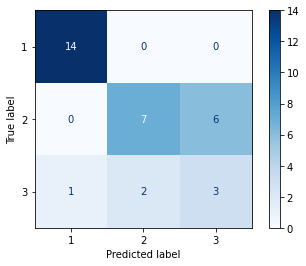

In [226]:
plot_confusion_matrix(knn_raw, x_test, y_test, cmap='Blues', values_format='d')

### 6.2. Metrics of Tuned KNN model

In [239]:
y_pred_tuned = Tunned_KNN.predict(x_test)

In [240]:
eval_model(Tunned_KNN, y_pred_tuned, y_test)

+---------+--------------------+--------------------+--------------------+--------------------+
|  Model  |   Accuracy Score   |    Recall Score    |  Precision Score   |     F 1 Score      |
+---------+--------------------+--------------------+--------------------+--------------------+
| Raw_KNN | 0.8484848484848485 | 0.8484848484848485 | 0.8579824216187851 | 0.8497843153015567 |
+---------+--------------------+--------------------+--------------------+--------------------+


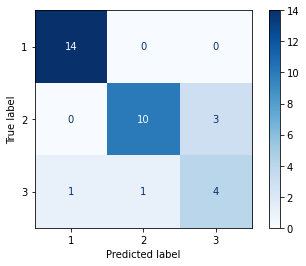

In [241]:
plot_confusion_matrix(Tunned_KNN, x_test, y_test, cmap='Blues', values_format='d')


## 7. Pickling

In [232]:
import pickle

In [233]:
knn_raw = pickle.dump(knn_raw, open("knn_model.sav", "wb"))

In [234]:
knn_tuned= pickle.dump(Tunned_KNN, open("knn_tuned_model.sav", "wb"))